# Video Game Sales - Exploratory data analysis (EDA)

## Questions for Analysis
* Who are the top 10 best selling developers?
* What are some of the differences between the Sales Markets?
* What dummy variables can we create?
* How can we view relative sales?

# Function Statements

In [158]:
%matplotlib inline
import pandas as pd
import numpy as np
import seaborn as sns
from __future__ import division

import matplotlib.pyplot as plt

In [159]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'],axis =1 ,inplace = True)
print ("Shape of Dataframe: " + str(df.shape))
df

Shape of Dataframe: (18919, 10)


,name,developer,platform,genre,total_sales,na_sales,eu_sales,japan_sales,other_sales,release_year
0,Grand Theft Auto V Read the review,Rockstar North,PS3,Action,20.32,6.37,9.85,0.99,3.12,2013
1,Grand Theft Auto V,Rockstar North,PS4,Action,19.39,6.06,9.71,0.60,3.02,2014
2,Grand Theft Auto: Vice City,Rockstar North,PS2,Action,16.15,8.41,5.49,0.47,1.78,2002
3,Grand Theft Auto V,Rockstar North,X360,Action,15.86,9.06,5.33,0.06,1.42,2013
4,Grand Theft Auto III,DMA Design,PS2,Action,13.10,6.99,4.51,0.30,1.30,2001
...,...,...,...,...,...,...,...,...,...,...
18914,"Nora, Princess, and Stray Cat",Harukaze,NS,Visual Novel,0.00,0.01,0.01,0.00,0.01,2018
18915,Memories Off: Innocent File,5pb. Games,NS,Visual Novel,0.00,0.01,0.01,0.00,0.01,2018
18916,Enkan no Memoria: Kakera Tomoshi,A'sRing,PSV,Visual Novel,0.00,0.01,0.01,0.00,0.01,2018
18917,Disorder 6,5pb. Games,X360,Visual Novel,0.00,0.01,0.01,0.00,0.01,2013


## Univariate Analysis
#### Let's check our platforms and see how well they've been selling.

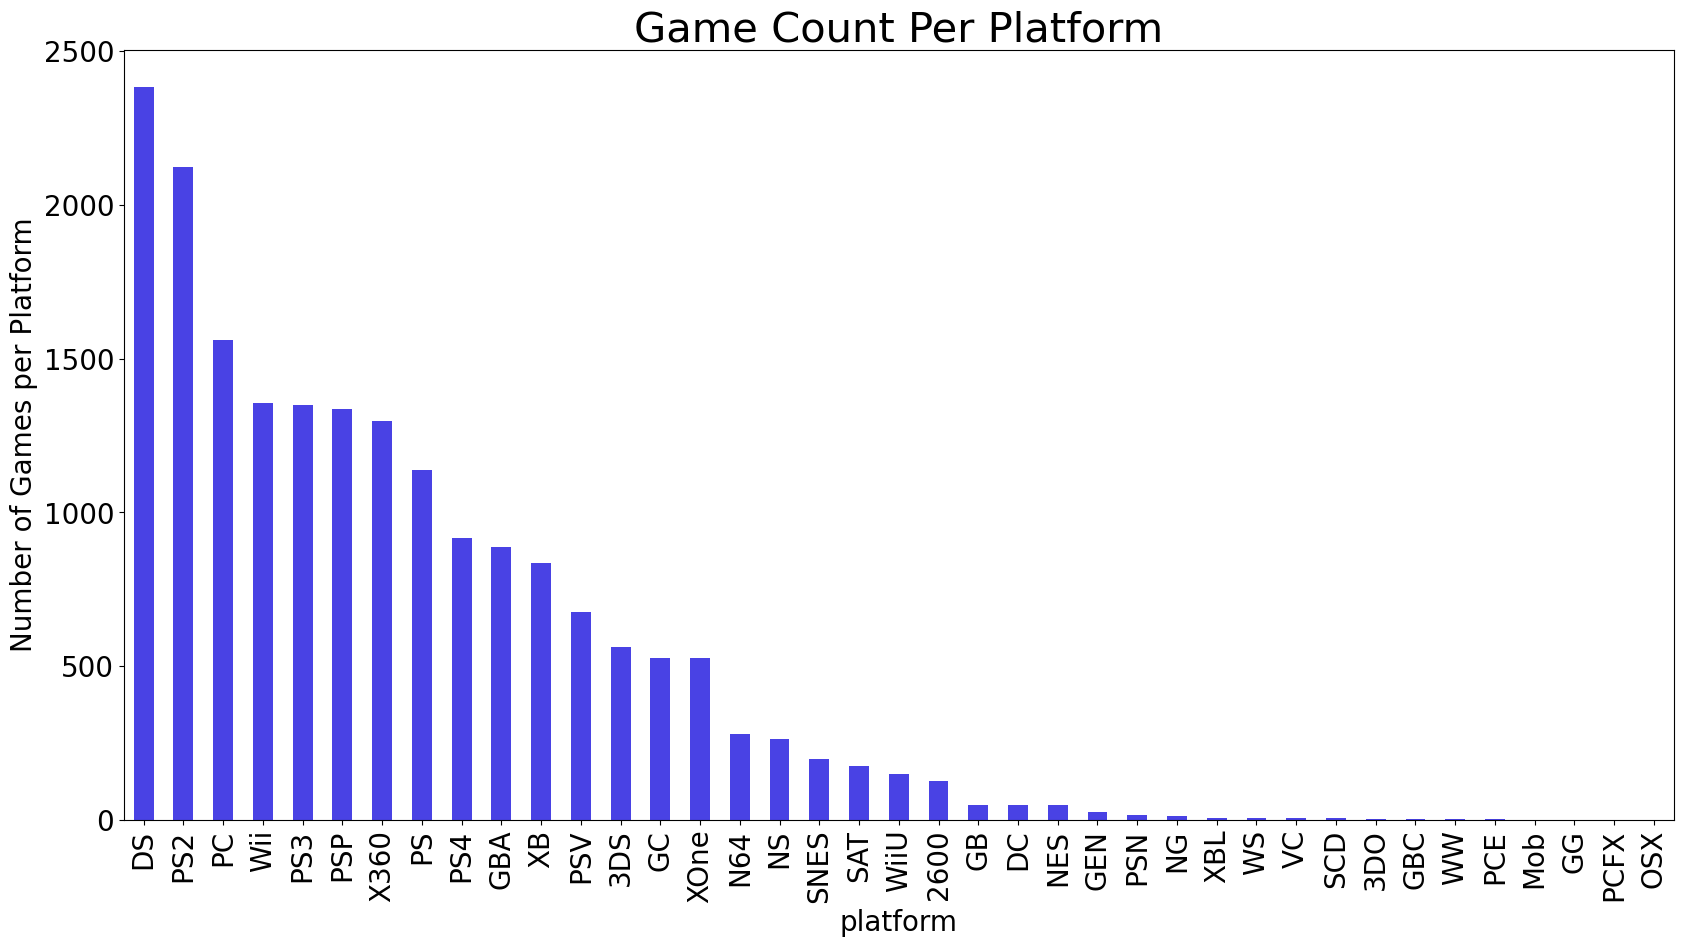

In [160]:
ax9 = df['platform'].value_counts().plot.bar(color='#4942E4', fontsize=20, title='Game Count Per Platform', figsize=(20,10))

ax9.set_ylabel("Number of Games per Platform",fontsize=20)
ax9.set_xlabel("platform",fontsize=20)
ax9.title.set_size(30)
plt.show()

The plot above shows how many games per platform our data contains. All platforms will be generalized to 3 platform types: handhelds, consoles, and PC.

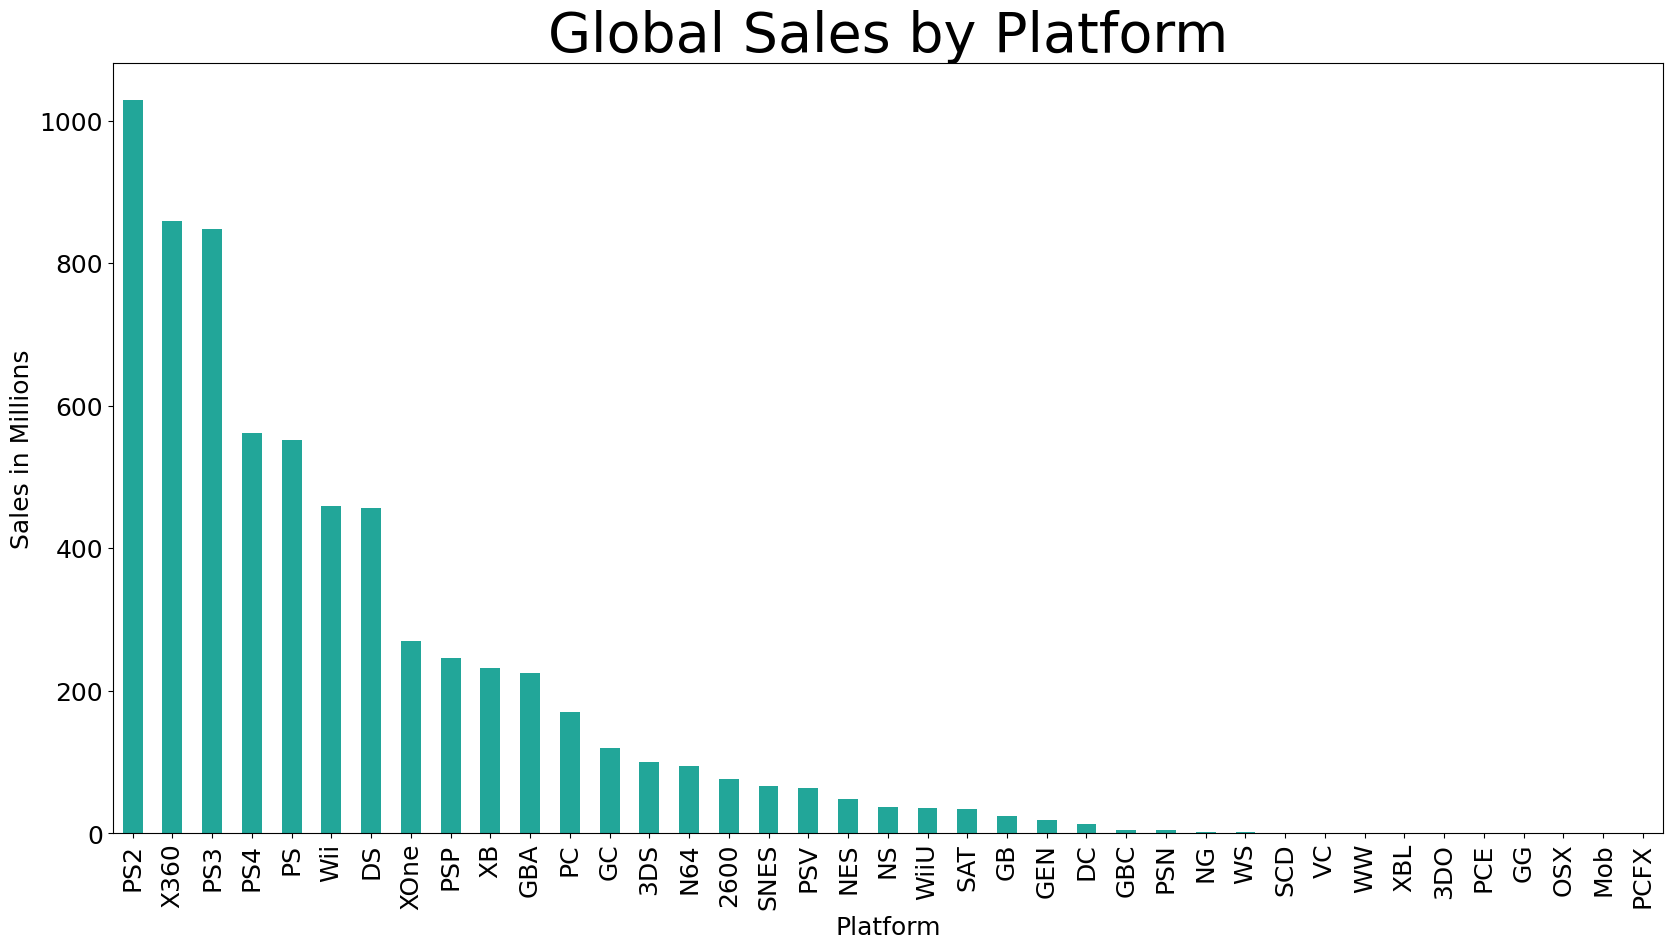

In [161]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

platform_sales = df.groupby("platform").sum()["total_sales"]
sorted_platform_sales = platform_sales.sort_values(ascending=False)  # Sort the platform sales in descending order

plt.figure(figsize=(20, 10))
ax = sorted_platform_sales.plot.bar(title="Global Sales by Platform", color='#22A699', fontsize=18)
ax.title.set_size(40)
ax.set_ylabel("Sales in Millions", fontsize=18)
ax.set_xlabel("Platform", fontsize=18)

plt.show()

PS2 has sold the most games even though DS holds the highest game count.

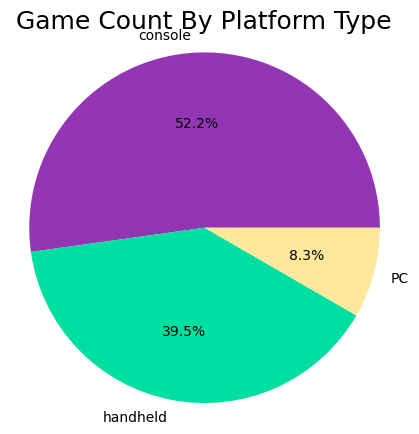

In [162]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

#directory to map consoles to console type
platform_type = {'2600': 'console', '3DO': 'console', '3DS': 'handheld', 'DC': 'console', 'DS': 'handheld',
                 'GB': 'handheld', 'GBA': 'handheld', 'GBC': 'handheld', 'GC': 'console', 'GEN': 'console',
                 'GG': 'console', 'Mob': 'handheld', 'N64': 'console', 'NES': 'console', 'NG': 'console',
                 'NS': 'handheld', 'OSX': 'PC', 'PC': 'PC', 'PCE': 'console', 'PCFX': 'console', 'PS': 'handheld',
                 'PS2': 'console', 'PS3': 'console', 'PS4': 'console', 'PSN': 'PC', 'PSP': 'handheld',
                 'PSV': 'handheld', 'SAT': 'console', 'SCD': 'handheld', 'SNES': 'console', 'VC': 'console',
                 'Wii': 'console', 'WiiU': 'handheld', 'WS': 'handheld', 'WW': 'console', 'X360': 'console',
                 'XB': 'console', 'XBL': 'console', 'XOne': 'console'}

df["platform_type"] = df["platform"].map(lambda x: platform_type[x])

platform_counts = df['platform_type'].value_counts()
colors = ['#9336B4', '#00dfa2', '#FFE79B']  # Custom colors for the pie chart

plt.figure(figsize=(5, 5))
plt.pie(platform_counts, labels=platform_counts.index, colors=colors, autopct='%1.1f%%')
plt.title('Game Count By Platform Type', fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

Percentage of games of a certian platform type (PC, Handheld and Console) from the df.

More than half of the games sold are console games.
The next pie chart will show the correlating sales.

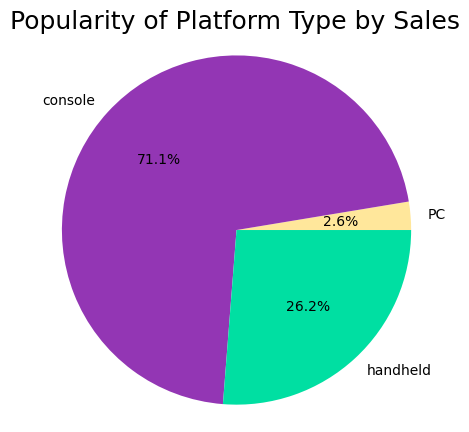

In [163]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

platform_type = {'2600': 'console', '3DO': 'console', '3DS': 'handheld', 'DC': 'console', 'DS': 'handheld',
                 'GB': 'handheld', 'GBA': 'handheld', 'GBC': 'handheld', 'GC': 'console', 'GEN': 'console',
                 'GG': 'console', 'Mob': 'handheld', 'N64': 'console', 'NES': 'console', 'NG': 'console',
                 'NS': 'handheld', 'OSX': 'PC', 'PC': 'PC', 'PCE': 'console', 'PCFX': 'console', 'PS': 'handheld',
                 'PS2': 'console', 'PS3': 'console', 'PS4': 'console', 'PSN': 'PC', 'PSP': 'handheld',
                 'PSV': 'handheld', 'SAT': 'console', 'SCD': 'handheld', 'SNES': 'console', 'VC': 'console',
                 'Wii': 'console', 'WiiU': 'handheld', 'WS': 'handheld', 'WW': 'console', 'X360': 'console',
                 'XB': 'console', 'XBL': 'console', 'XOne': 'console'}

df["platform_type"] = df["platform"].map(lambda x: platform_type[x])

platform_sales = df.groupby("platform_type").sum()["total_sales"]
colors = ['#FFE79B', '#9336B4', '#00dfa2']  # Custom colors for the pie chart
plt.figure(figsize=(5, 5))

plt.pie(platform_sales, labels=platform_sales.index,colors=colors, autopct='%1.1f%%')
plt.title('Popularity of Platform Type by Sales', fontsize=18)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle

plt.show()

Percentage of game sales for each platform type.

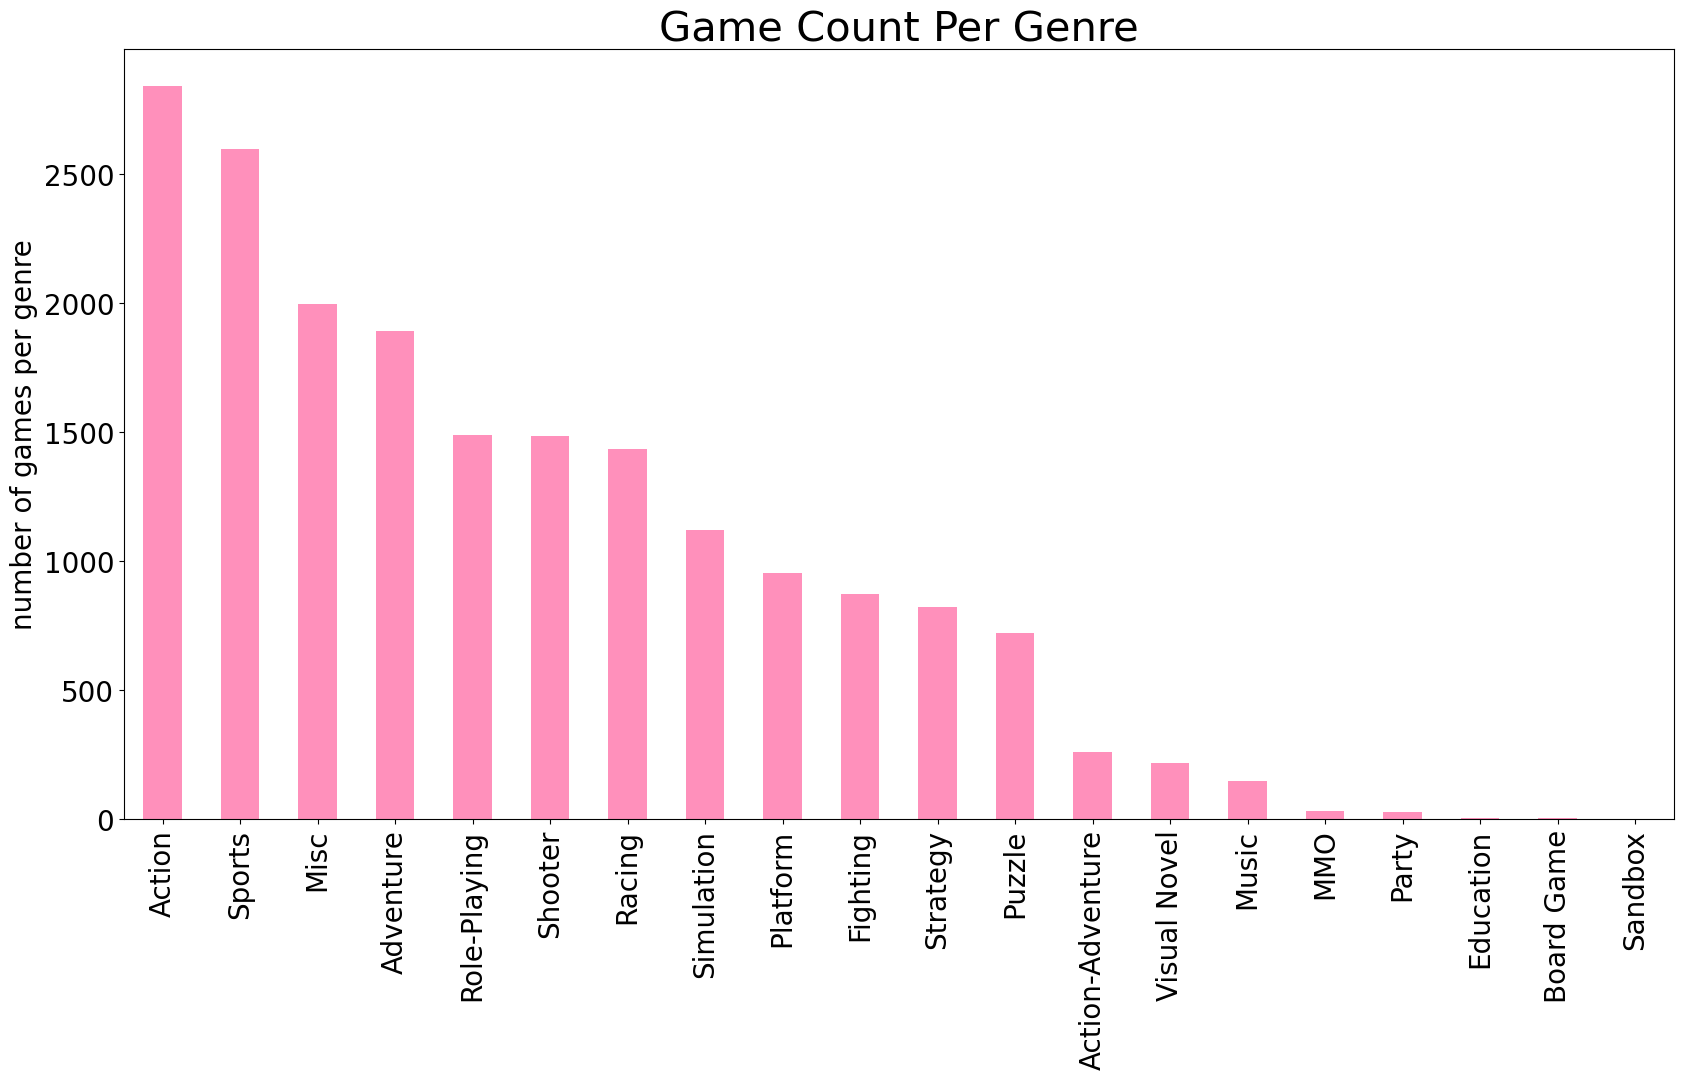

In [164]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

ax = df['genre'].value_counts().plot.bar(color='#FF90BB', fontsize=20, title='Game Count Per Genre', figsize=(20, 10))
ax.set_ylabel("number of games per genre",fontsize=20)
ax.title.set_size(30)

The action and sports games are developed considerably more than the others.

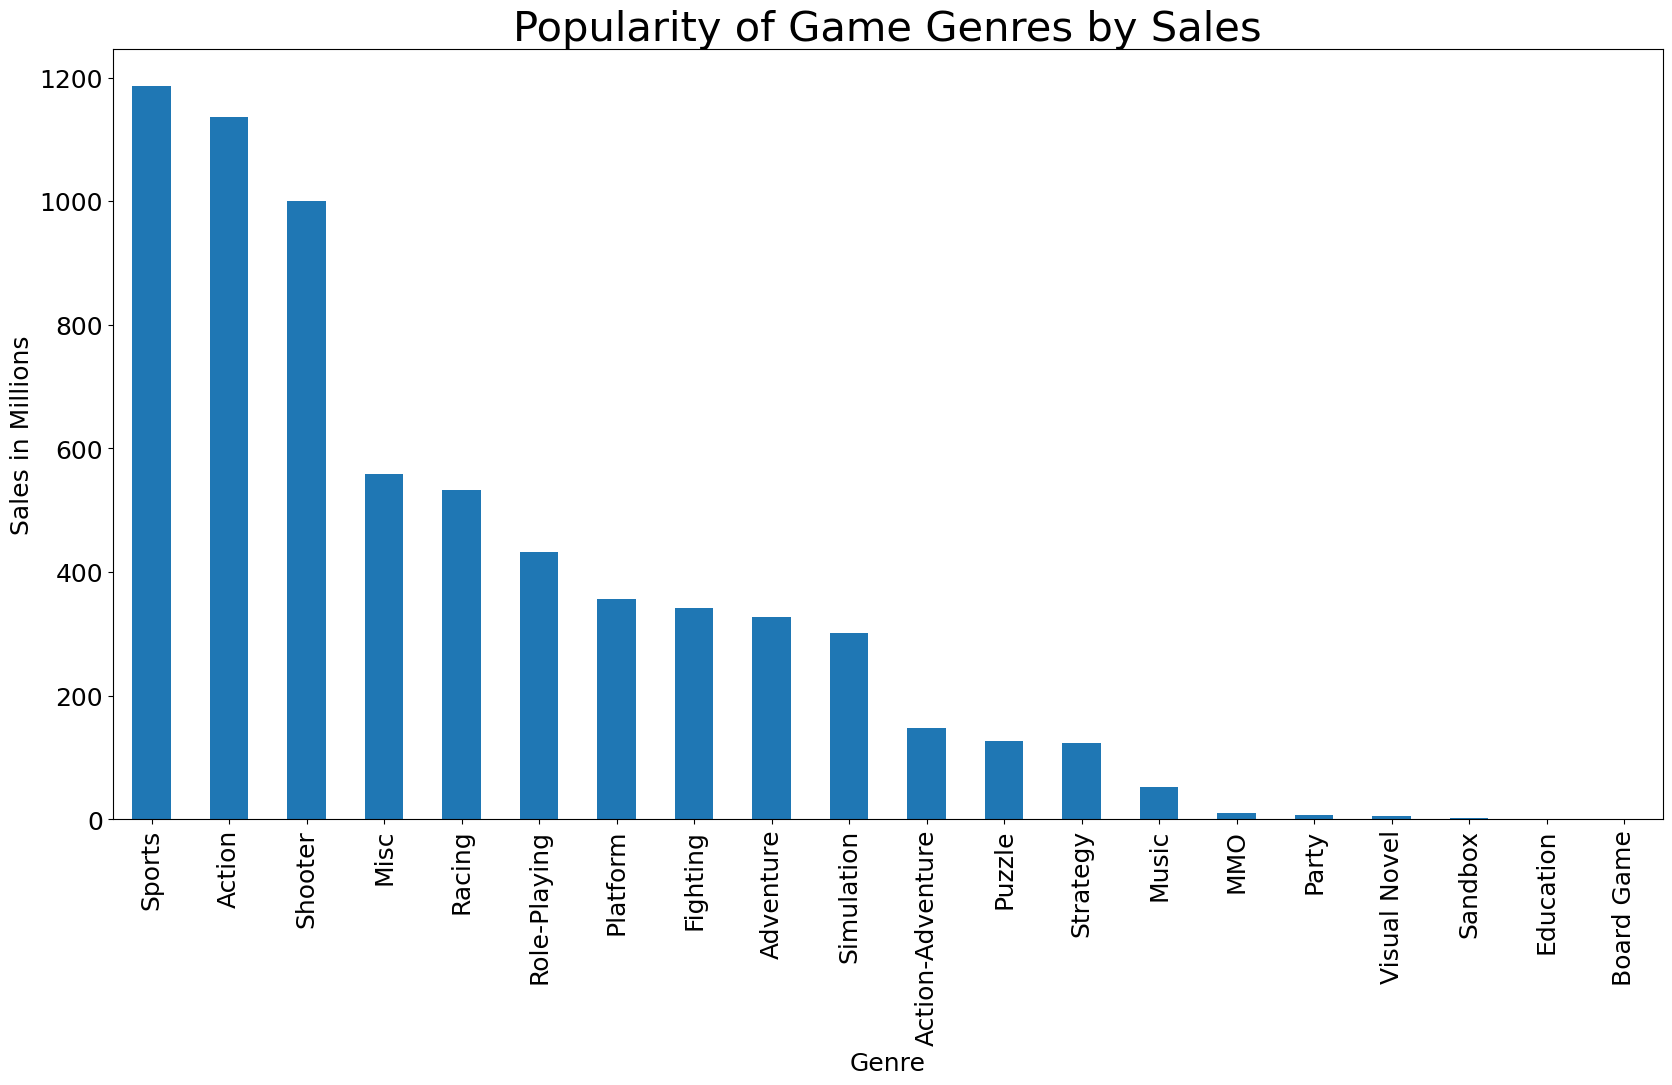

In [165]:
df = pd.read_csv("games_df.csv")

title = "Popularity of Game Genres by Sales"
ax1 = df.groupby("genre").sum()["total_sales"].sort_values(ascending=False).plot.bar(title=title, figsize=(20, 10), fontsize=18)

ax1.set_ylabel("Sales in Millions", fontsize=18)
ax1.set_xlabel("Genre", fontsize=18)
ax1.title.set_size(30)

plt.show()


Sports games sell the best even though action games are developed more.

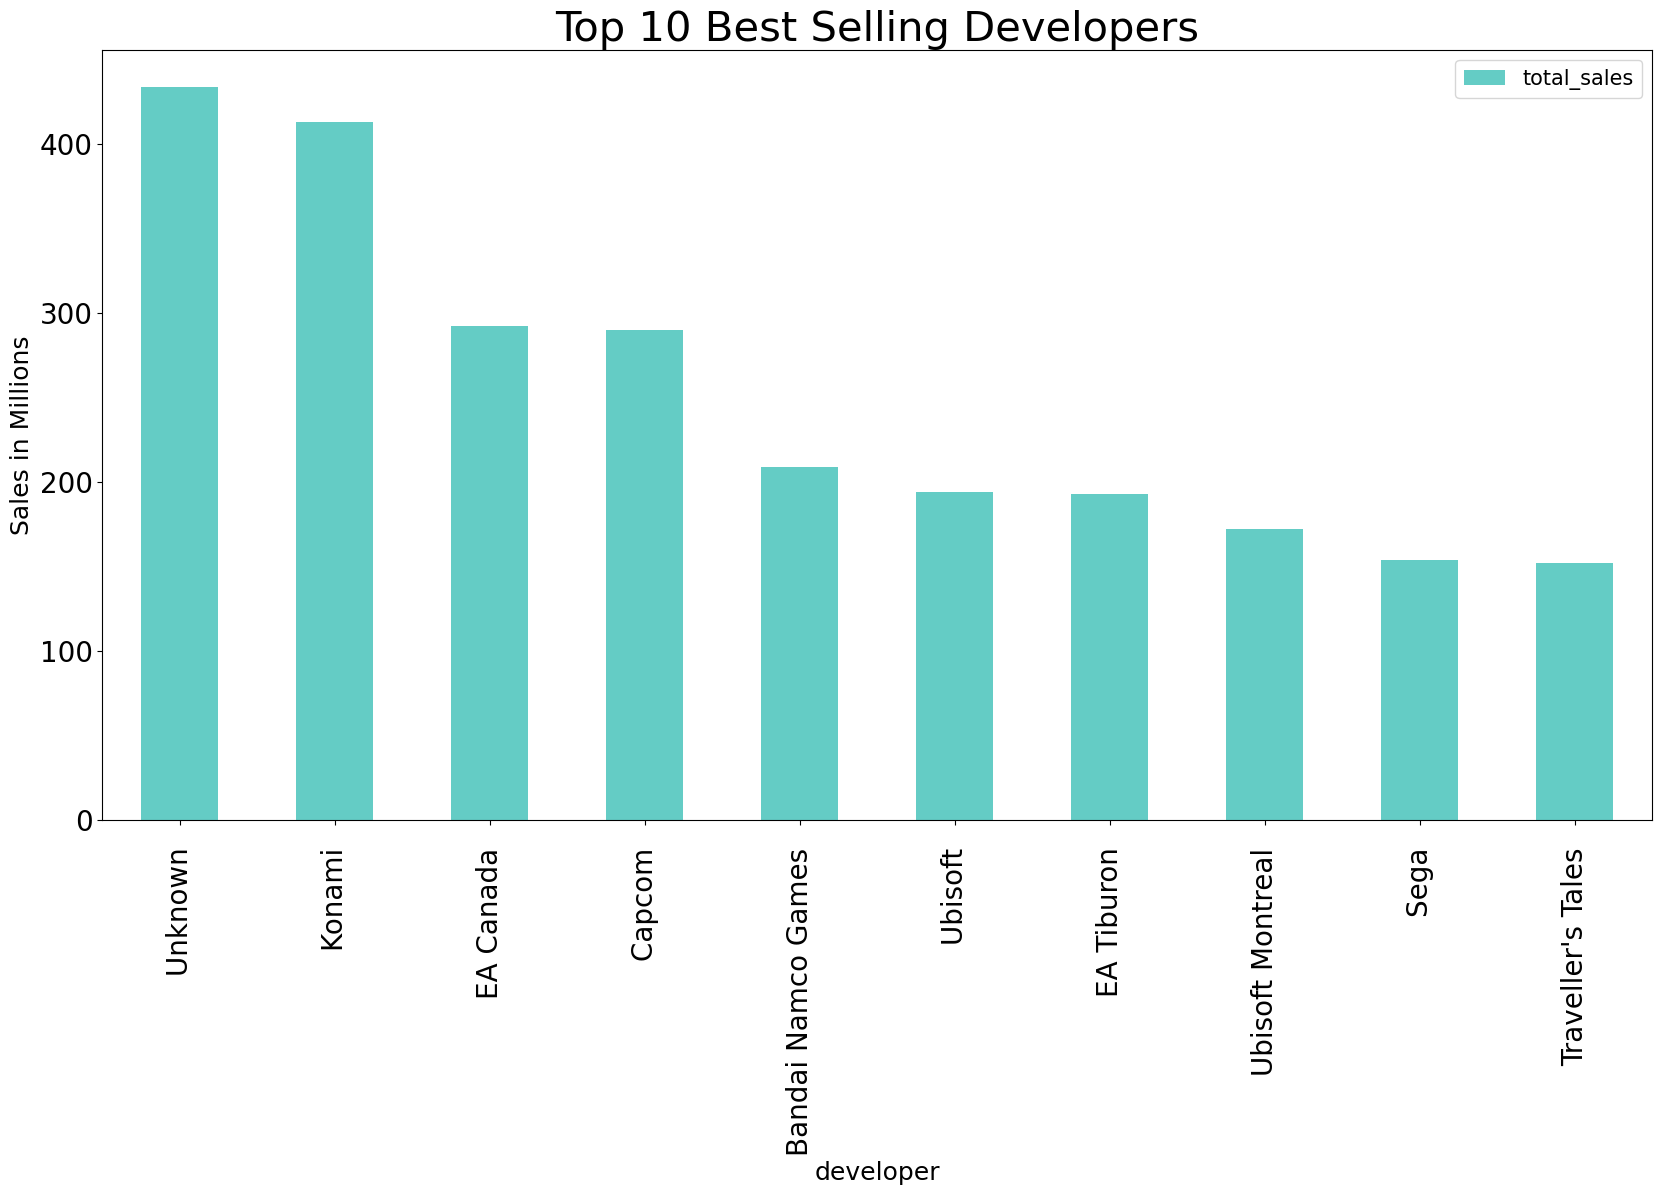

In [166]:
top_publishers = df[["developer", "total_sales"]].groupby("developer").count().sort_values("total_sales", ascending=False).head(10)
top_publishers.plot.bar(title="Top 10 Best Selling Developers",figsize=(20,10),fontsize=20, color ='#64CCC5'
).title.set_size(30)
plt.ylabel("Sales in Millions",fontsize=18)
plt.xlabel("developer",fontsize=18) 
plt.legend(fontsize=15)
plt.show()

Although a substantial number of games are developed by "unknown" developers, the sales ratio between all developers is still noticed.
We will now break down the genres of Konami, the next best selling developer.

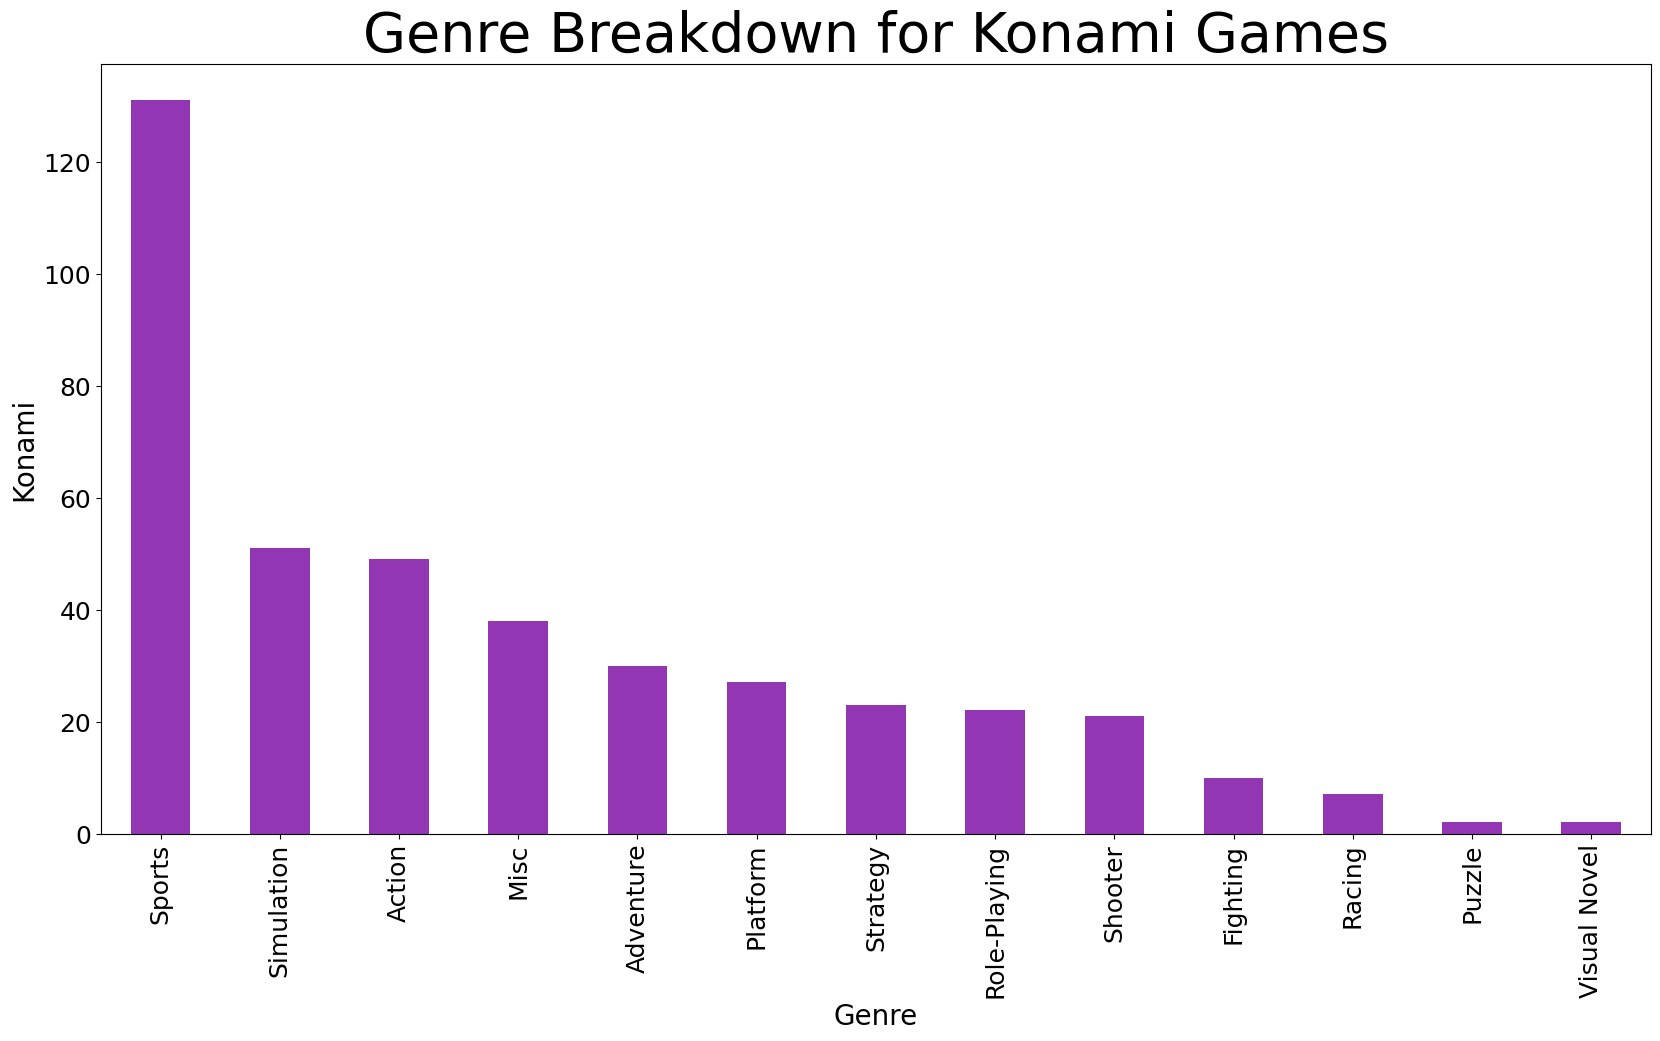

In [167]:
df = pd.read_csv("games_df.csv")
df.drop(['Unnamed: 0'], axis=1, inplace=True)

Konami_Games = df.loc[df["developer"] == "Konami  "]
genre_counts = Konami_Games.groupby("genre").count()["total_sales"]
sorted_genre_counts = genre_counts.sort_values(ascending=False)  # Sort the genre counts in descending order

plt.figure(figsize=(20, 10))
ax = sorted_genre_counts.plot.bar(fontsize=18, title="Genre Breakdown for Konami Games", color='#9336B4')
ax.title.set_size(40)
plt.xlabel('Genre', fontsize=20)
plt.ylabel('Konami', fontsize=20)

plt.show()

Most of Konami's games fall under the sports genre.

## Multivariate Analysis

Ideas:

* Stacked bar charts from examples above
* What are the publisher's best selling games?
* What are the best selling consoles?


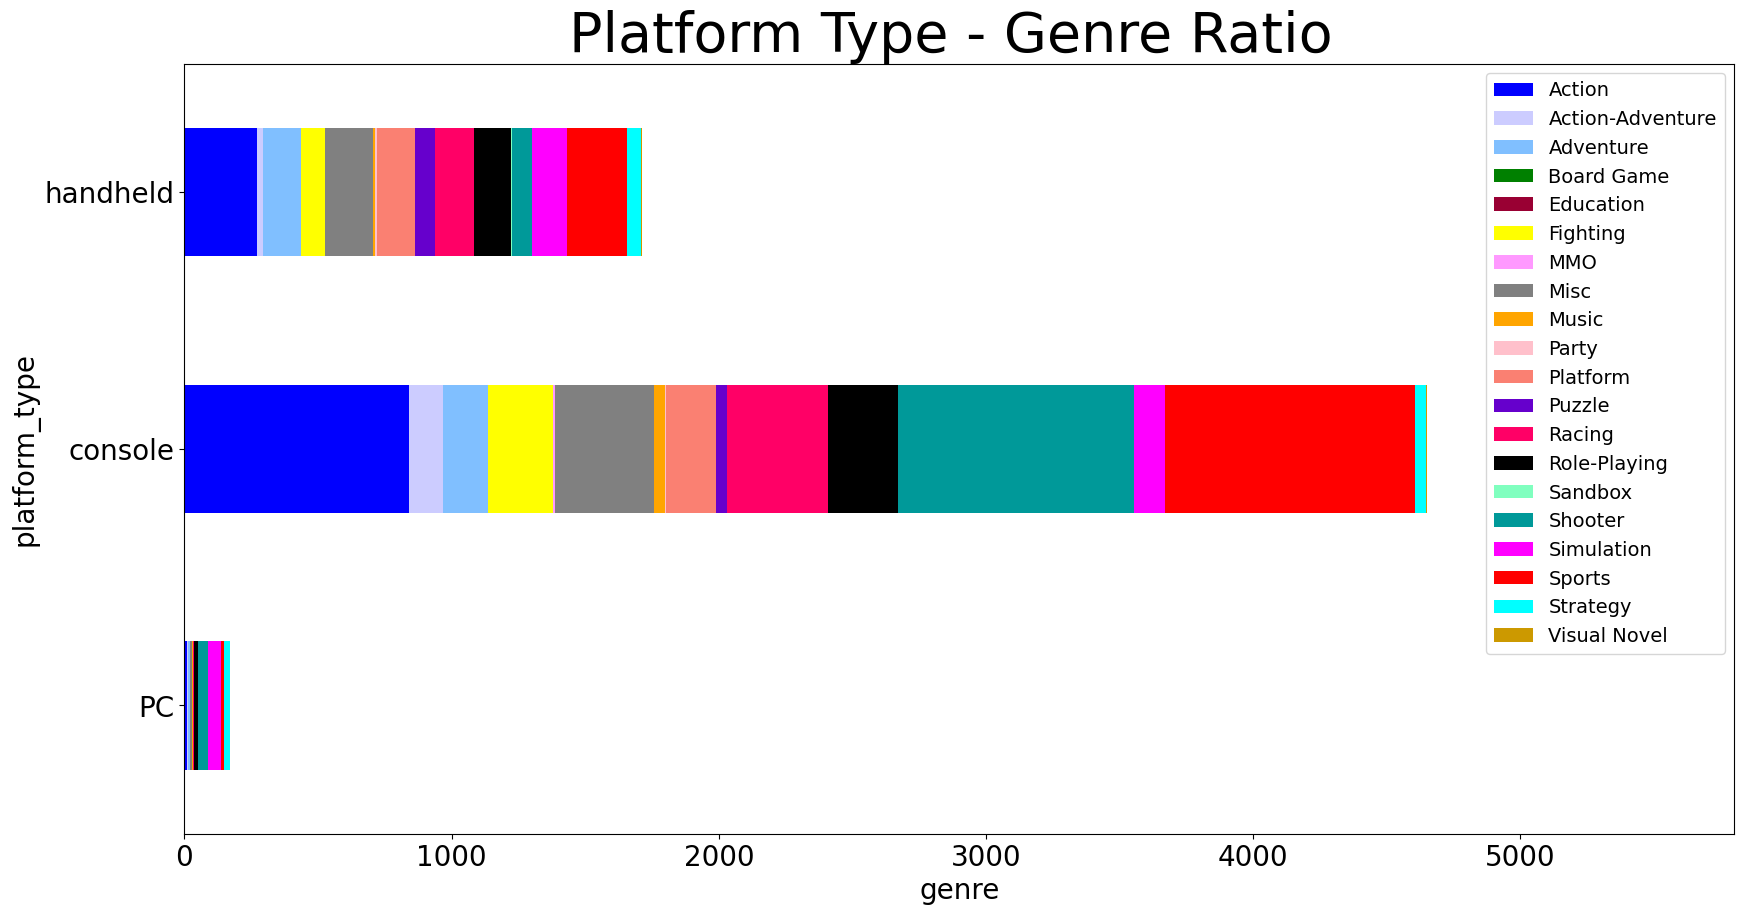

In [168]:
#קשר בין סוג פלטפורמה לזאנר

top_consoles\
    .groupby(["platform_type", "genre"])\
    .sum()["total_sales"]\
    .unstack("genre")\
    .fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = 'Platform Type - Genre Ratio ',color = ['blue','#ccccff','#80bfff',
                                                                                            'green','#990033', 'yellow','#ff99ff','grey','orange',
                                                                                            'pink','salmon','#6600cc','#ff0066','black','#80ffbf',
                                                                                            '#009999','Fuchsia','red','Aqua','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('genre',fontsize=20)
plt.ylabel('platform_type',fontsize=20)
plt.legend(fontsize=14)
plt.xlim(0,5800)
plt.show()

Above is the visualization of most developed consoles by platform type (which console has the most games, by platform type)

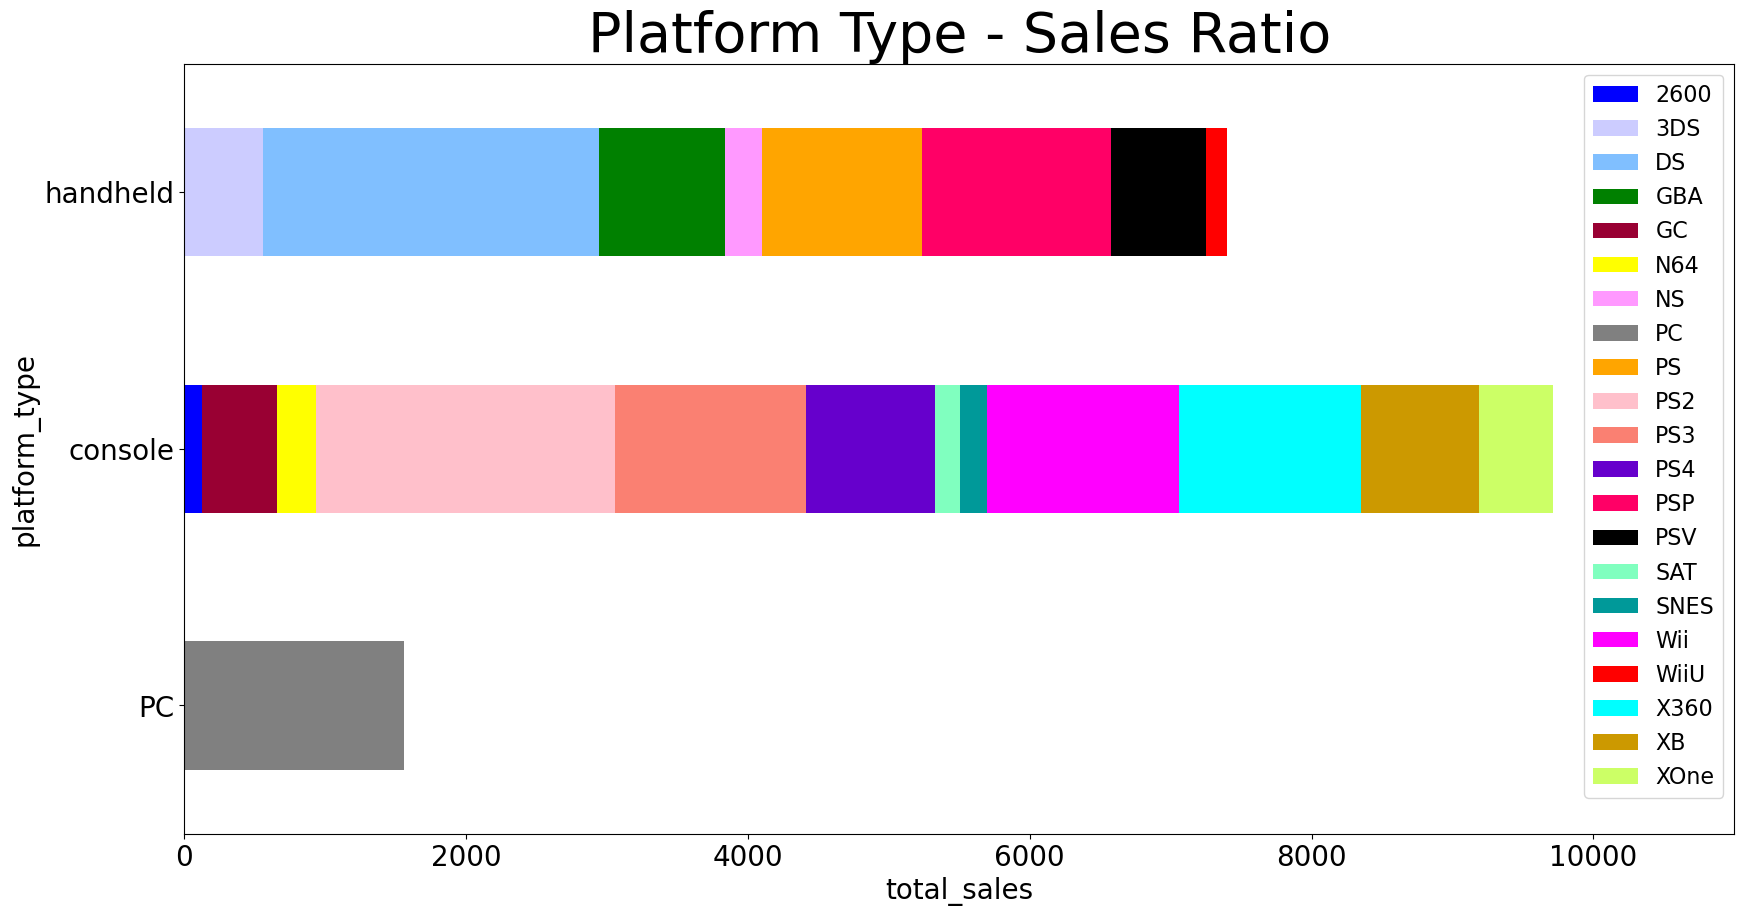

In [169]:
df = pd.read_csv("games_df.csv")
platform_type = {'2600': 'console', '3DO': 'console', '3DS': 'handheld', 'DC': 'console', 'DS': 'handheld',
                 'GB': 'handheld', 'GBA': 'handheld', 'GBC': 'handheld', 'GC': 'console', 'GEN': 'console',
                 'GG': 'console', 'Mob': 'handheld', 'N64': 'console', 'NES': 'console', 'NG': 'console',
                 'NS': 'handheld', 'OSX': 'PC', 'PC': 'PC', 'PCE': 'console', 'PCFX': 'console', 'PS': 'handheld',
                 'PS2': 'console', 'PS3': 'console', 'PS4': 'console', 'PSN': 'PC', 'PSP': 'handheld',
                 'PSV': 'handheld', 'SAT': 'console', 'SCD': 'handheld', 'SNES': 'console', 'VC': 'console',
                 'Wii': 'console', 'WiiU': 'handheld', 'WS': 'handheld', 'WW': 'console', 'X360': 'console',
                 'XB': 'console', 'XBL': 'console', 'XOne': 'console'}

df["platform_type"] = df["platform"].map(lambda x: platform_type[x])

console_count=df.groupby("platform").count()["total_sales"]
console_count = console_count[console_count > 55]
top_consoles = df[df.platform.isin(list(console_count.keys()))]

top_consoles.groupby(["platform_type", "platform"]).count()["total_sales"]\
    .unstack("platform").fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = "Platform Type - Sales Ratio",color=['blue','#ccccff','#80bfff',
                                                                                            'green','#990033', 'yellow','#ff99ff','grey','orange',
                                                                                            'pink','salmon','#6600cc','#ff0066','black','#80ffbf',
                                                                                            '#009999','Fuchsia','red','Aqua','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('total_sales',fontsize=20)
plt.ylabel('platform_type',fontsize=20)
plt.legend(fontsize=16)
plt.xlim(0,11000)
plt.show()

Above is the visualization of the best selling consoles by platform type (which console has sold the most games, by platform type)

In [170]:
df_n = df.copy()
df_n.drop(['name', 'developer','genre','total_sales','platform','other_sales','release_year'], axis='columns', inplace=True)


df_n = df_n.sort_values('japan_sales',ascending = True).groupby('platform_type').tail(100)


df_n = df_n.groupby('platform_type').agg({'na_sales':'sum',
                                           'eu_sales':'sum','japan_sales':'sum'})

df_n['max_sales'] = df_n.max(axis=1)
df_n['max_region'] = df_n.idxmax(axis=1)


df_n

#נעשה גרופביי סוג פלטפורמה ונחבר את המכירות
#קשר בין איזור לסוג פלטפורמה שזה בעצם איפה הפלטפורמה הכי הצליחה שזה איפה היא הכי נמכרה

,na_sales,eu_sales,japan_sales,max_sales,max_region
platform_type,,,,,
PC,7.41,7.47,1.57,7.47,eu_sales
console,34.99,45.09,87.11,87.11,japan_sales
handheld,10.46,7.84,78.21,78.21,japan_sales


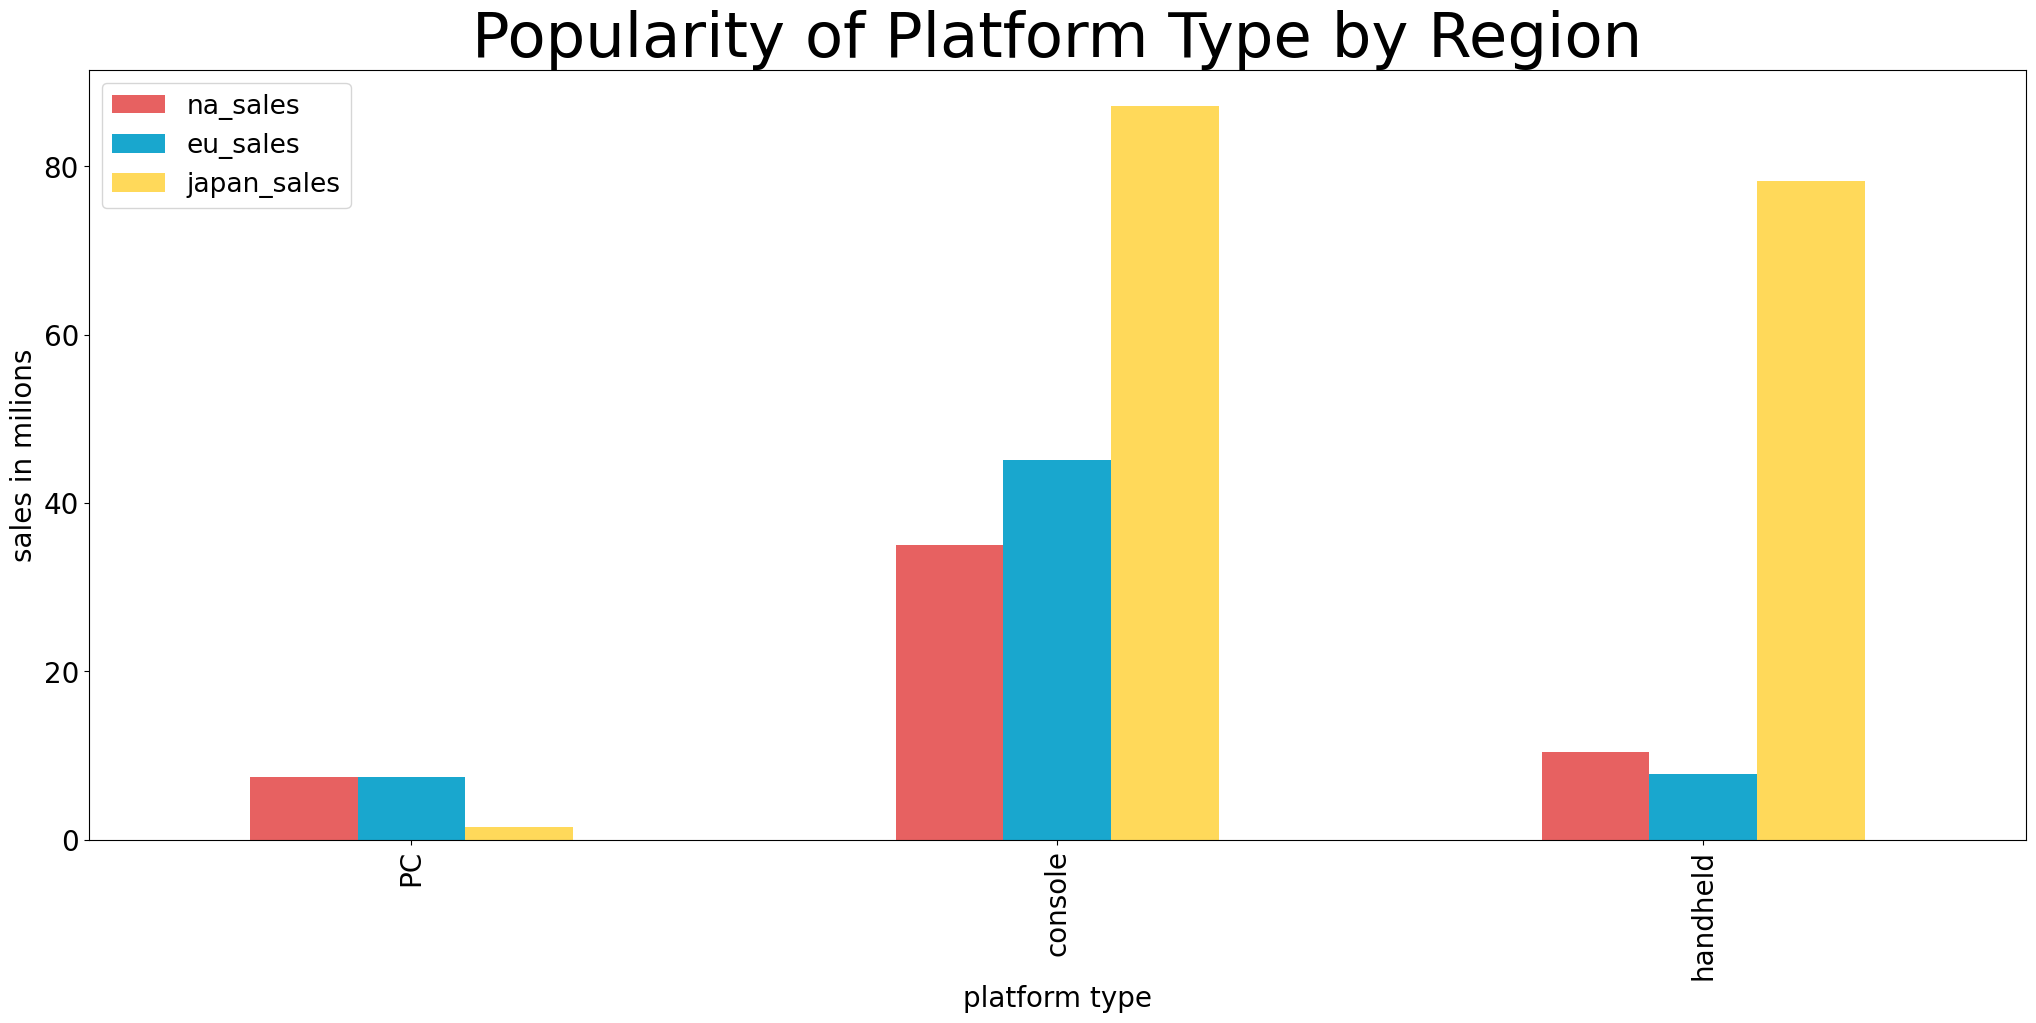

In [182]:
col_na_sales_list = df_n['na_sales'].tolist()
col_eu_sales_list = df_n['eu_sales'].tolist()
col_japan_sales_list = df_n['japan_sales'].tolist()
platform_type_to_list = df_n.index.values.tolist()

dff = pd.DataFrame({'na_sales': col_na_sales_list,
                   'eu_sales': col_eu_sales_list,
                  'japan_sales':col_japan_sales_list }, index = platform_type_to_list)
ax = dff.plot.bar(title = 'Popularity of Platform Type by Region',figsize=(25,10),fontsize=20, color = {'na_sales':'#E76161','eu_sales':'#19A7CE','japan_sales':'#FFD95A'})
ax.title.set_size(45)
plt.xlabel('platform type',fontsize=20)
plt.ylabel('sales in milions',fontsize=20)
plt.legend(fontsize=19)
plt.show()

The vast majority of handheld games are sold in Japan.

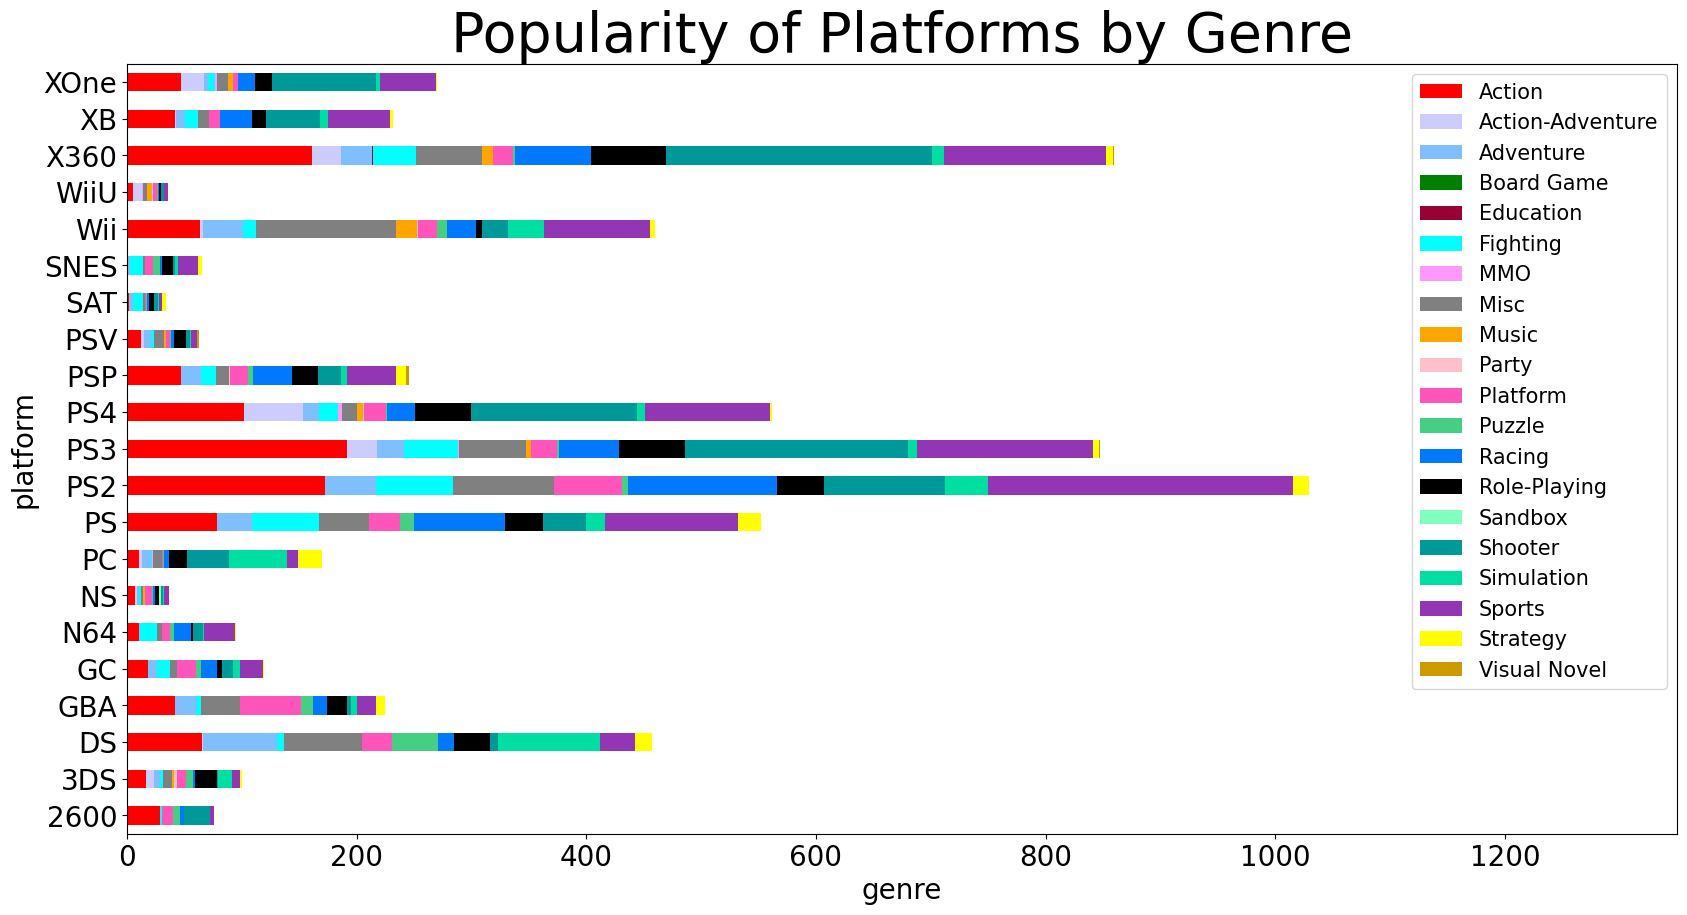

In [172]:
top_consoles\
    .groupby(["platform", "genre"])\
    .sum()["total_sales"]\
    .unstack("genre")\
    .fillna(0)\
    .plot.barh(stacked=True,figsize=(20,10),fontsize=20,title = 'Popularity of Platforms by Genre',color = ['red','#ccccff','#80bfff',
                                                                                            'green','#990033', 'Aqua','#ff99ff','grey','orange',
                                                                                            'pink','#FF55BB','#44cf82','#0079FF','black','#80ffbf',
                                                                                            '#009999','#00DFA2','#9336B4','yellow','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('genre',fontsize=20)
plt.ylabel('platform',fontsize=20)
plt.legend(fontsize=15)
plt.xlim(0,1350)
plt.show()

Action and Sports games constitute a significant portion of PS2 games.

In [173]:
top_publishers = df.groupby("developer").count()["total_sales"].sort_values(ascending=False).head(10)
top_publishers = df[df["developer"].isin(top_publishers.keys())]

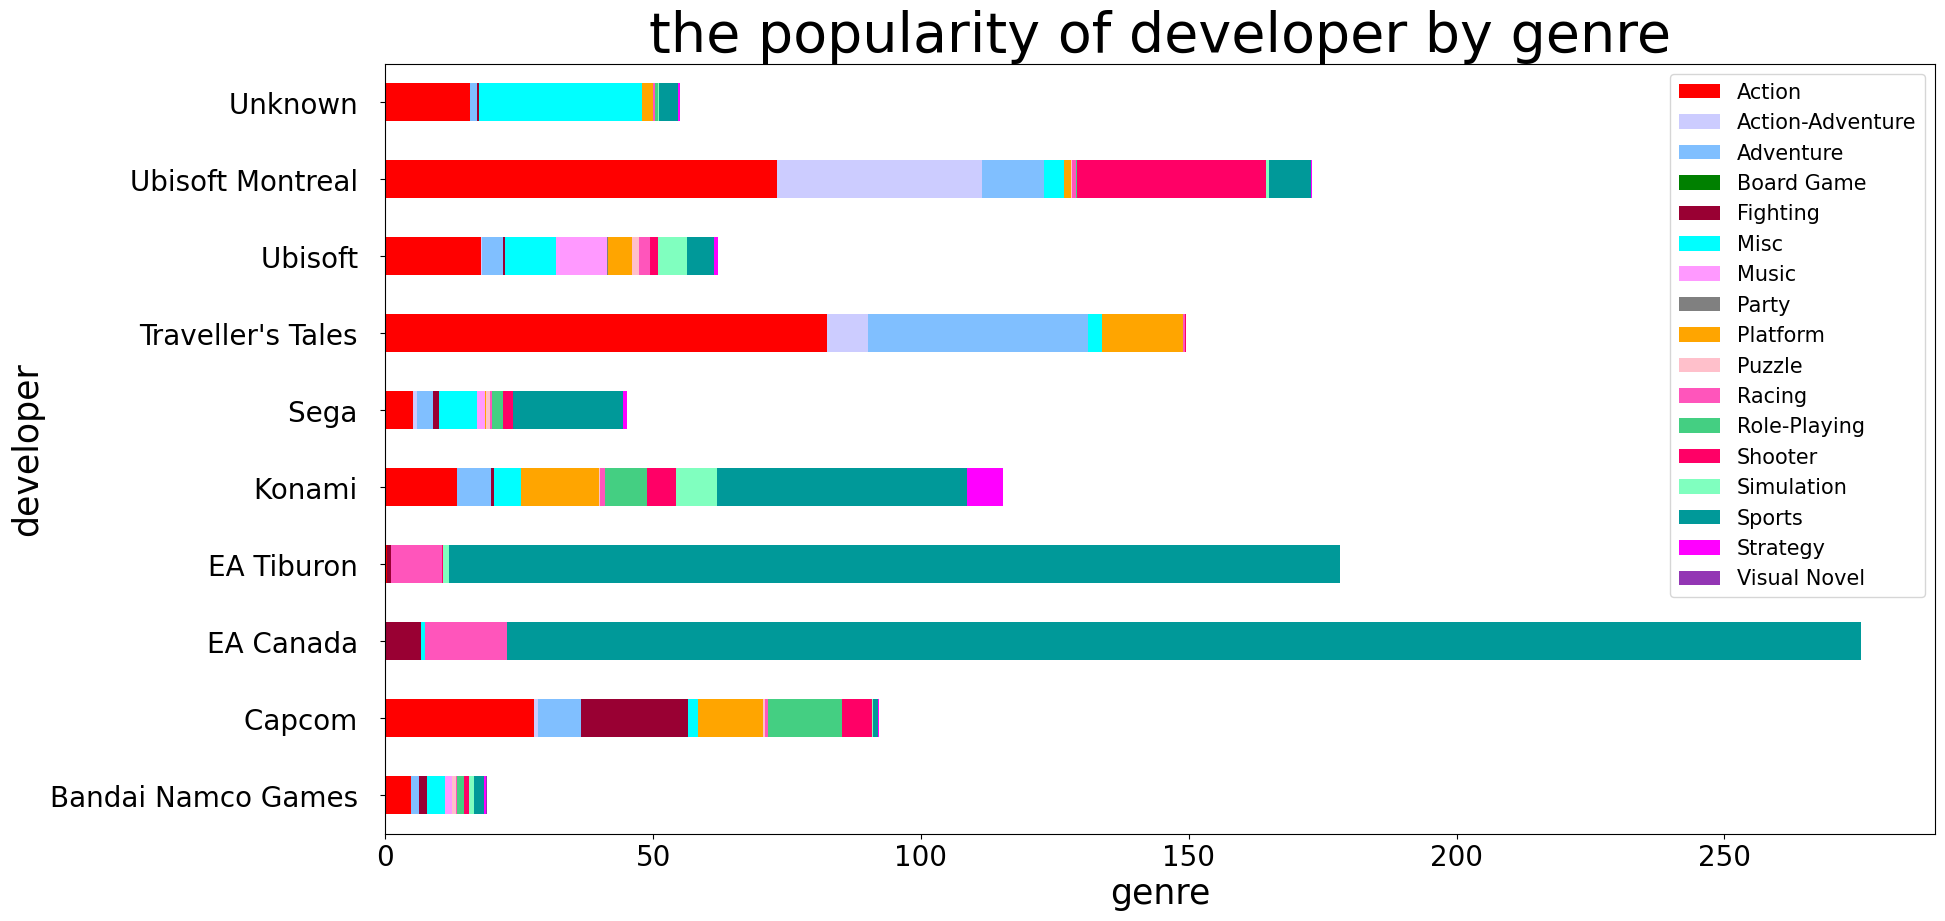

In [174]:
top_publishers.groupby(["developer", "genre"])\
    .sum()["total_sales"]\
    .unstack("genre")\
    .fillna(0)\
    .plot.barh(stacked=True, figsize=(20,10),fontsize=20, title = 'the popularity of developer by genre',color = ['red','#ccccff','#80bfff',
                                                                                            'green','#990033', 'Aqua','#ff99ff','grey','orange',
                                                                                            'pink','#FF55BB','#44cf82','#ff0066','#80ffbf',
                                                                                            '#009999','Fuchsia','#9336B4','#9336B4','#cc9900','#ccff66']).title.set_size(40)
plt.xlabel('genre',fontsize=25)
plt.ylabel('developer',fontsize=25)
plt.legend(fontsize=15)
plt.show()

This graph depicts the distribution of genres of given developers. We can notice a dominant genre in most development companies, for example: EA specializes in the sports genre and sticks to it.

In [175]:
# יוצרים טבלה רק זאנר ומכירות
copy_of_data = df.copy()
data_by_genre = [copy_of_data['genre'],copy_of_data['total_sales'].astype(float)
                 ,copy_of_data['na_sales'].astype(float)
                 ,copy_of_data['eu_sales'].astype(float)
                 ,copy_of_data['japan_sales'].astype(float)
                 ,copy_of_data['other_sales'].astype(float)
                ]
headers = ["genre", "total_sales","na_sales","eu_sales","japan_sales","other_sales"]
sales_and_genres = pd.concat(data_by_genre, axis=1, keys=headers)
# choosing top 100 sales for each genre

df1 = sales_and_genres.sort_values('japan_sales',ascending = True).groupby('genre').tail(100)
df1

,genre,total_sales,na_sales,eu_sales,japan_sales,other_sales
2992,Action-Adventure,0.16,0.07,0.07,0.01,0.01
2994,Action-Adventure,0.16,0.02,0.10,0.01,0.03
2996,Action-Adventure,0.16,0.10,0.05,0.01,0.01
5000,Education,0.12,0.09,0.02,0.01,0.00
5001,Education,0.09,0.08,0.01,0.01,0.01
...,...,...,...,...,...,...
11190,Role-Playing,5.35,1.75,1.23,1.87,0.51
15390,Sports,2.05,0.01,0.01,2.05,0.01
15380,Sports,2.20,0.15,0.01,2.05,0.01
15339,Sports,2.79,0.29,0.20,2.13,0.18


In [176]:
# מחברים שורות שיש בהן את אותו הזאנר ומחברים את המכירות
df = df1.groupby('genre').agg({'na_sales':'sum',
                                           'eu_sales':'sum','japan_sales':'sum'})
df

,na_sales,eu_sales,japan_sales
genre,,,
Action,56.31,51.30,36.49
Action-Adventure,47.76,46.56,5.47
Adventure,14.37,10.60,22.58
Board Game,0.08,0.24,0.04
Education,0.68,0.21,0.04
Fighting,14.58,10.70,38.02
MMO,4.06,3.05,1.54
Misc,10.32,10.42,33.93
Music,20.19,11.86,6.35


In [177]:
# נוסיף עמודה עם הערך הגבוה בכל שורה
df_max_sales = df.copy()
df_max_sales['max_sales'] = df_max_sales.max(axis=1)

df_max_sales

,na_sales,eu_sales,japan_sales,max_sales
genre,,,,
Action,56.31,51.30,36.49,56.31
Action-Adventure,47.76,46.56,5.47,47.76
Adventure,14.37,10.60,22.58,22.58
Board Game,0.08,0.24,0.04,0.24
Education,0.68,0.21,0.04,0.68
Fighting,14.58,10.70,38.02,38.02
MMO,4.06,3.05,1.54,4.06
Misc,10.32,10.42,33.93,33.93
Music,20.19,11.86,6.35,20.19


In [178]:
# נוסיף עמודה עם השם של העמודה של האזור ששיך אליו הערך המקסימלי
df_max_sales_region = df_max_sales.copy()
df_max_sales_region['max_region'] = df_max_sales_region.idxmax(axis=1)
df_max_sales_region

,na_sales,eu_sales,japan_sales,max_sales,max_region
genre,,,,,
Action,56.31,51.30,36.49,56.31,na_sales
Action-Adventure,47.76,46.56,5.47,47.76,na_sales
Adventure,14.37,10.60,22.58,22.58,japan_sales
Board Game,0.08,0.24,0.04,0.24,eu_sales
Education,0.68,0.21,0.04,0.68,na_sales
Fighting,14.58,10.70,38.02,38.02,japan_sales
MMO,4.06,3.05,1.54,4.06,na_sales
Misc,10.32,10.42,33.93,33.93,japan_sales
Music,20.19,11.86,6.35,20.19,na_sales


In [179]:
col_na_sales = df_max_sales_region['na_sales'].tolist()
col_eu_sales = df_max_sales_region['eu_sales'].tolist()
col_japan_sales = df_max_sales_region['japan_sales'].tolist()
genre = df_max_sales_region.index.values.tolist()

genre

['Action',
 'Action-Adventure',
 'Adventure',
 'Board Game',
 'Education',
 'Fighting',
 'MMO',
 'Misc',
 'Music',
 'Party',
 'Platform',
 'Puzzle',
 'Racing',
 'Role-Playing',
 'Sandbox',
 'Shooter',
 'Simulation',
 'Sports',
 'Strategy',
 'Visual Novel']

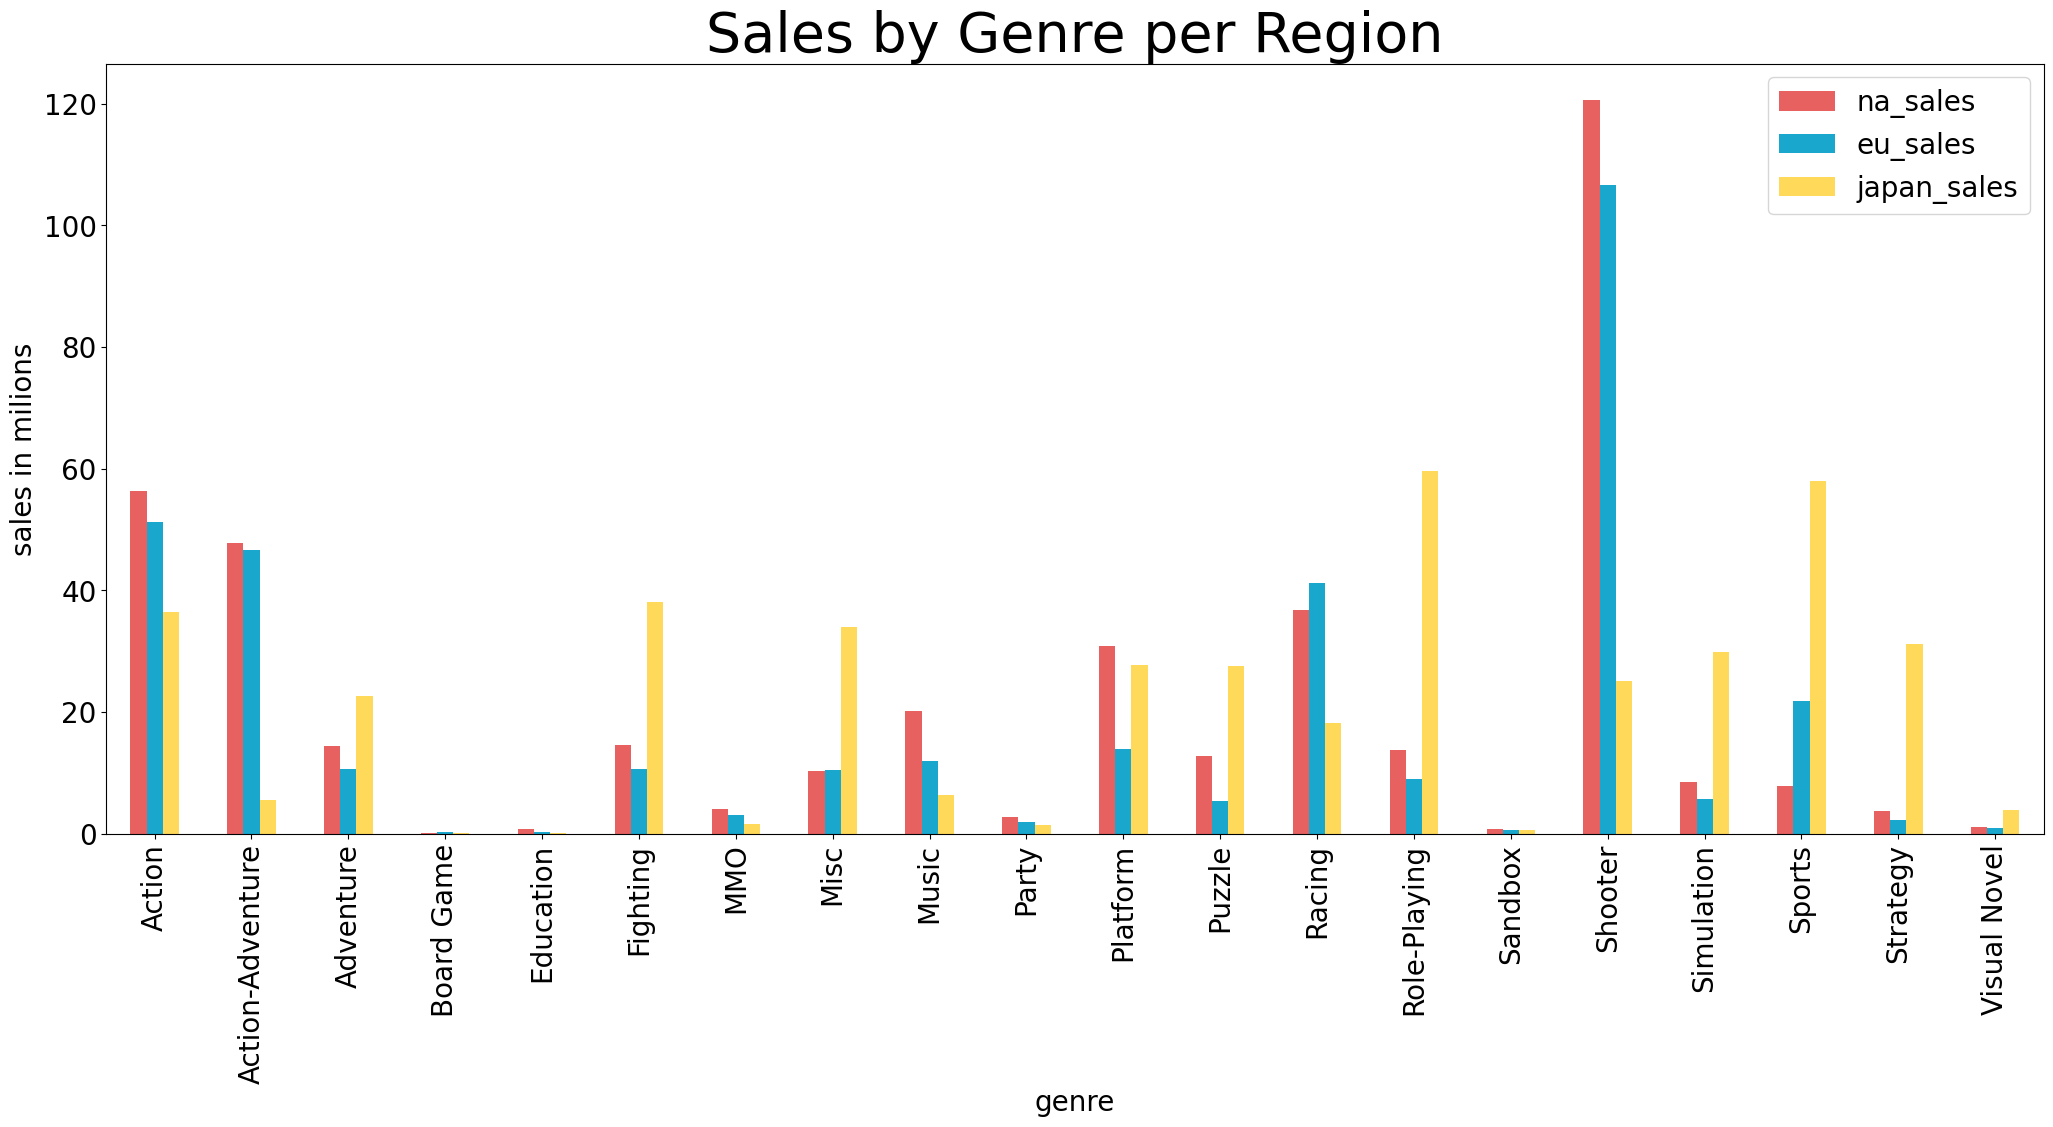

In [181]:
df = pd.DataFrame({'na_sales': col_na_sales,
                   'eu_sales': col_eu_sales,
                  'japan_sales':col_japan_sales }, index = genre)
ax = df.plot.bar(title = 'Sales by Genre per Region',figsize=(25,10),fontsize=20, color = {'na_sales':'#E76161','eu_sales':'#19A7CE','japan_sales':'#FFD95A'})
ax.title.set_size(40)
plt.xlabel('genre',fontsize=20)
plt.ylabel('sales in milions',fontsize=20)
plt.legend(fontsize=20)
plt.show()

While the Japanese market does not have a clear leading genre, the European and North American markets have a clear leading genre: Shooter.